# Heart attack prediction 

#### 大致參考了 kaggle網站裡面 Rishabh Arya的程式碼 名稱是 
Heart Attack Analysis - Beginner friendly....💘🤓



##### 網站：https://www.kaggle.com/aryarishabh/heart-attack-analysis-beginner-friendly-90

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info() ## look up type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.nunique() ## Gross glace data categorical condition.

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

# About this data:
About this dataset

1.age:- it respresents the age of patients

2.sex:- it represents the sex of patients (1 stands for 'MALE' and 0 stands for 'FEAMLE')

3.cp:- cp stands for chest pain.
In this dataset,there are four types of chest pain 
(0=asymptomatic, 1=typical angina, 2=atypical angina, 3=non-anginal pain)

4.trtbps:- Resting blood pressure(in mm hg on admission to the hospital)

5.chol:- Serum cholestoral in mg/dl

6.fbs:-Fasting blood sugar>120mg/dl (1=true, 0=false)

7.restecg:-Resting electrocardiography results(0=normal, 1=having ST-T wave normality, 2=hypertrophy)

8.thalachh:- Maximum heart rate achieved

9.exng:-exercise induced angina(1=yes, 0=no)

10.oldpeak:-ST depression induced by exercise relative to rest

11.slp:- Slope of peak exercise ST segment(0= dowmsloping, 1=flat, 2=upsloping)

12.caa:-Number of major vessels(0-3) coloured by flourosopy)

13.thall:-Thalassemia blood disorder(1=fixed defect, 2=normal, 3=reversable defect)

14.output:- The target variable and predicted attribute(0=less chance of heart attack, 1=high rate of heart attack)

In [5]:
df.isna().sum() # check up na value.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## About sex distribution

In [6]:
pd.value_counts(df['sex']) # male=1, female=0

1    207
0     96
Name: sex, dtype: int64

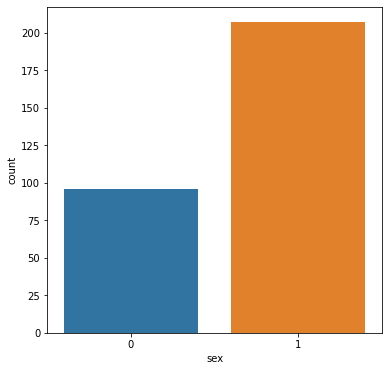

In [7]:
plt.figure(figsize=(6, 6))
sns.countplot(x="sex", data=df);

## About output distribution:

In [8]:
pd.value_counts(df['output']) 

1    165
0    138
Name: output, dtype: int64

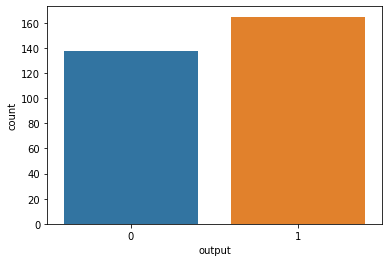

In [9]:
sns.countplot(x="output", data=df);

## About age distribution:

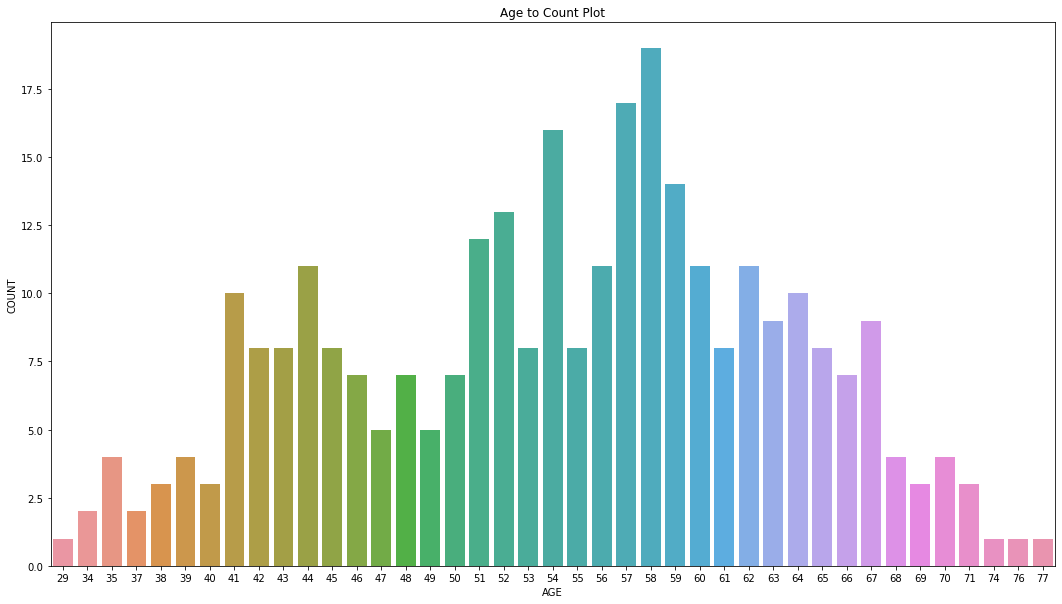

In [10]:
plt.figure(figsize=(18, 10))
sns.countplot(x=df["age"]);  # using countplot
plt.title("Age to Count Plot")
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.show();

## Data variable correlation

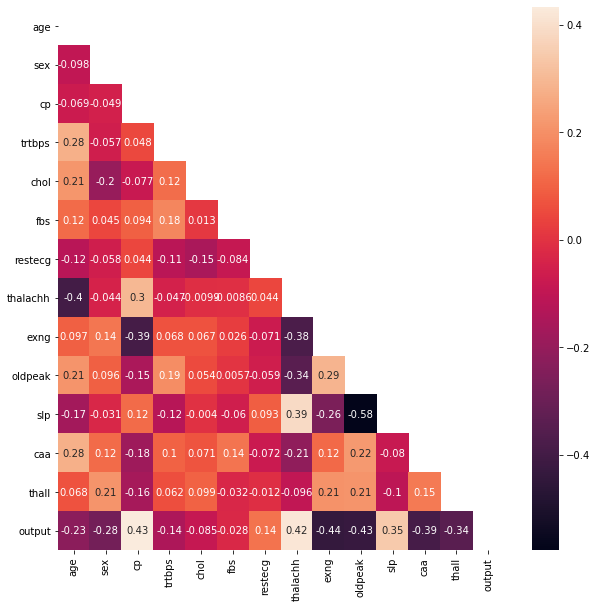

In [11]:
corr = df.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr,dtype=np.bool) #
mask[np.triu_indices_from(mask)] = True  #
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

# Prepare data:

In [12]:
X_data = df.drop(['output'], axis = 1)
X_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
Y_data = df['output']
Y_data

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [14]:
print('X shape: ',X_data.shape)
print('Y shape: ',Y_data.shape)

X shape:  (303, 13)
Y shape:  (303,)


# Scaling the numerical features

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)?

rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [15]:
from sklearn.preprocessing import MinMaxScaler

num_features = ['age','trtbps','chol','thalachh','oldpeak']
cat_features = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

scaler = MinMaxScaler()
scaler.fit(X_data[num_features])
X_scaled = pd.DataFrame(scaler.transform(X_data[num_features]),columns=num_features)
X_scaled = pd.concat([X_scaled, X_data[cat_features]], axis=1)
X_scaled.head()

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,3,1,0,0,0,0,1
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,2,0,1,0,0,0,2
2,0.250000,0.339623,0.178082,0.770992,0.225806,0,1,0,0,0,2,0,2
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,1,0,1,0,2,0,2
4,0.583333,0.245283,0.520548,0.702290,0.096774,0,0,0,1,1,2,0,2


# Prepare traning data set and test data set

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_data,train_size=0.75,random_state=42)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
x_train.head()

(227, 13) (227,)
(76, 13) (76,)


,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
287,0.58,0.57,0.24,0.71,0.00,1,1,0,0,0,2,1,2
282,0.62,0.30,0.21,0.48,0.35,1,2,1,1,0,1,1,1
197,0.79,0.29,0.29,0.70,0.03,1,0,1,1,0,1,2,3
158,0.60,0.29,0.21,0.56,0.06,1,1,0,1,0,1,4,3
164,0.19,0.42,0.11,0.78,0.00,1,2,0,1,0,2,4,2


# Model prediction
## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = range(1,x_train.shape[1])#
training_accuracy = [] 
testing_accuracy = []
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors =n, n_jobs=-1)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train, y_train))
    testing_accuracy.append(knn.score(x_test, y_test))
    print(f'knn(n = {n}): train accuracy = ', '{:.2f}, testing accuracy= {:.5f}'.format(training_accuracy[n-1], testing_accuracy[n-1]))



knn(n = 1): train accuracy =  1.00, testing accuracy= 0.81579
knn(n = 2): train accuracy =  0.89, testing accuracy= 0.73684
knn(n = 3): train accuracy =  0.90, testing accuracy= 0.86842
knn(n = 4): train accuracy =  0.90, testing accuracy= 0.77632
knn(n = 5): train accuracy =  0.90, testing accuracy= 0.82895
knn(n = 6): train accuracy =  0.89, testing accuracy= 0.80263
knn(n = 7): train accuracy =  0.88, testing accuracy= 0.86842
knn(n = 8): train accuracy =  0.89, testing accuracy= 0.84211
knn(n = 9): train accuracy =  0.87, testing accuracy= 0.86842
knn(n = 10): train accuracy =  0.88, testing accuracy= 0.84211
knn(n = 11): train accuracy =  0.87, testing accuracy= 0.86842
knn(n = 12): train accuracy =  0.87, testing accuracy= 0.85526


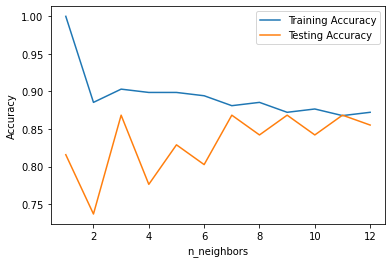

In [22]:
plt.plot(n_neighbors, training_accuracy, label='Training Accuracy')
plt.plot(n_neighbors, testing_accuracy, label = 'Testing Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

In [56]:
best_predic_n =testing_accuracy.index(max(testing_accuracy))+1

print(f'max testing accuracy, when n={best_predic_n}, accuracy ={max(testing_accuracy)}')


max testing accuracy, when n=3, accuracy =0.868421052631579


In [57]:
Each_model_name = [] ##prepare for further used.
Each_model_accuracy = {}
Each_model_dict = {}
knn_best_testing_predict_model = KNeighborsClassifier(n_neighbors=best_predic_n)
Each_model_name.append('knn_model (n= {})'.format(best_predic_n))
Each_model_dict['knn_model (k= {})'.format(best_predic_n)] = knn_best_testing_predict_model
Each_model_accuracy['knn_model (n= {})'.format(best_predic_n)] = max(testing_accuracy)

In [58]:
Each_model_accuracy

{'knn_model (n= 3)': 0.868421052631579}

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10) ##
logreg.fit(x_train, y_train)
print('Traing Score:', logreg.score(x_train, y_train))
print('Testing Score:', logreg.score(x_test, y_test))



Traing Score: 0.8590308370044053
Testing Score: 0.8421052631578947


In [60]:
Each_model_name.append('Logistic Regression')
Each_model_dict['Logistic Regression'] = logreg
Each_model_accuracy['Logistic Regression']= logreg.score(x_test, y_test)

# Linear SVC

In [62]:
from sklearn.svm import LinearSVC
linearsvm = LinearSVC().fit(x_train,y_train)
#print("Coefficient :",linearsvm.coef_)
#print("Intercept :",linearsvm.intercept_)
print("Trainig Score:",linearsvm.score(x_train, y_train))
print("Testing Score:",linearsvm.score(x_test, y_test))

Trainig Score: 0.8458149779735683
Testing Score: 0.8421052631578947


In [63]:
Each_model_name.append('Linear SVC') 
Each_model_dict['Linear SVC'] = linearsvm
Each_model_accuracy['Linear SVC']=linearsvm.score(x_test,y_test)

# Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train,y_train)
print("Training Accuracy {:.3f}".format(tree.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(tree.score(x_test,y_test)))

Training Accuracy 0.903
Testing Accuracy 0.816


###### cross validation for hyperparamter tunning of DecisionTreeClassifier model

In [65]:
from sklearn.model_selection import GridSearchCV
param_test = {
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' :[2,3,4,5]
}
tree_cv = GridSearchCV(estimator= DecisionTreeClassifier(),
                             param_grid = param_test,scoring='accuracy',
                             n_jobs=-1,cv=5)
tree_cv.fit(x_train,y_train)
## This best score is the mean of five cross validation folds with the best hyperparamters. 
print(tree_cv.best_params_, tree_cv.best_score_)
print("Training Accuracy {:.3f}".format(tree_cv.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(tree_cv.score(x_test,y_test)))

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2} 0.7802898550724638
Training Accuracy 0.885
Testing Accuracy 0.763


In [66]:
Each_model_name.append('Decision Tree Classifier-after cv')
Each_model_dict['Decision Tree Classifier-after cv'] = tree_cv

In [67]:
Each_model_accuracy['Decision Tree Classifier-after cv'] = tree_cv.score(x_test,y_test)

# MLP Classifier

在sklearn中，MLP是利用隨機梯度或是LBFGS來做權重(參數)θ的計算。
MLP意為多層類神經網路，即有輸入層、輸出層跟至少一個隱藏層。

Multi-layer Perceptron classifier

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure 1 shows a one hidden layer MLP with scalar output.

參考網站：
##### https://scikit-learn.org/stable/modules/neural_networks_supervised.html#mlp-tips
##### https://martychen920.blogspot.com/2017/10/ml-mlpclassifier.html

In [68]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier().fit(x_train,y_train)
print("Training Accuracy {:.3f}".format(mlp.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(mlp.score(x_test,y_test)))

Training Accuracy 0.872
Testing Accuracy 0.855


#### Cross validation for hyperparamter tunning of MLPClassifier model.

In [69]:
param_test = {
    'activation' : ['logistic', 'tanh', 'relu'],
    'alpha' : [0.01,0.1,0.5,1],
    'learning_rate' : ['adaptive']
    
}
mlp_cv = GridSearchCV(estimator= MLPClassifier(),
                             param_grid = param_test,scoring='accuracy',
                             n_jobs=-1,cv=5)
mlp_cv.fit(x_train,y_train)
## This best score is the mean of five cross validation folds with the best hyperparamters. 
print(mlp_cv.best_params_, mlp_cv.best_score_)
print("Training Accuracy {:.3f}".format(mlp_cv.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(mlp_cv.score(x_test,y_test)))

{'activation': 'logistic', 'alpha': 0.01, 'learning_rate': 'adaptive'} 0.8326570048309179
Training Accuracy 0.850
Testing Accuracy 0.829


In [70]:
Each_model_name.append('MLP Classifier-after cv')
Each_model_dict['MLP Classifier-after cv'] = mlp_cv

In [71]:
Each_model_accuracy['MLP Classifier-after cv'] = mlp_cv.score(x_test,y_test)

# Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,max_depth=4).fit(x_train,y_train)
print("Training Accuracy {:.3f}".format(rf.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(rf.score(x_test,y_test)))

Training Accuracy 0.921
Testing Accuracy 0.842


#### Cross validation for hyperparamter tunning of random forest classifier model.

In [73]:
param_test = {
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' :[2,3,4,5]
}
rf_cv = GridSearchCV(estimator= RandomForestClassifier(n_estimators=500),
                             param_grid = param_test,scoring='accuracy',
                             n_jobs=-1,cv=5)
rf_cv.fit(x_train,y_train)
## This best score is the mean of five cross validation folds with the best hyperparamters. 
print(rf_cv.best_params_, rf_cv.best_score_)
print("Training Accuracy {:.3f}".format(rf_cv.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(rf_cv.score(x_test,y_test)))

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3} 0.8368115942028986
Training Accuracy 0.907
Testing Accuracy 0.842


In [74]:
Each_model_name.append('Random Forest Classifier-after cv')
Each_model_dict['Random Forest Classifier-after cv'] = rf_cv

In [75]:
Each_model_accuracy['Random Forest Classifier-after cv'] = rf_cv.score(x_test,y_test)

# Grandient Boosting Classifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()
gbrt.fit(x_train,y_train)
print("Training Accuracy {:.3f}".format(gbrt.score(x_train, y_train)))
print("Testing Accuracy {:.3f}".format(gbrt.score(x_test, y_test)))


Training Accuracy 1.000
Testing Accuracy 0.763


### cross validation for hyperparamter tunning of GradientBoostingClassifier model.

In [77]:
param_test = {
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split': np.arange(2, 12, 3),
    'min_samples_leaf': np.arange(1, 10, 3)
}
gbrt_cv = GridSearchCV(estimator= GradientBoostingClassifier(n_estimators=1000),
                             param_grid = param_test,scoring='accuracy',
                             n_jobs=-1,cv=5)
gbrt_cv.fit(x_train,y_train)
print(gbrt_cv.best_params_, gbrt_cv.best_score_)
print("Training Accuracy {:.3f}".format(gbrt_cv.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(gbrt_cv.score(x_test,y_test)))

{'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 5} 0.8104347826086956
Training Accuracy 1.000
Testing Accuracy 0.789


In [78]:
Each_model_name.append('Grandient Boosting Classifier aftr_cv')
Each_model_dict['Grandient Boosting Classifier aftr_cv'] = gbrt_cv

In [79]:
Each_model_accuracy['Grandient Boosting Classifier aftr_cv'] = gbrt_cv.score(x_test,y_test)

# AdaBoost Classifier

In [80]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.05)
ada.fit(x_train,y_train)
print("Training Accuracy {:.3f}".format(ada.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(ada.score(x_test,y_test)))

Training Accuracy 0.943
Testing Accuracy 0.803


In [81]:
Each_model_name.append('AdaBoost Classifier')
Each_model_dict['AdaBoost Classifier'] = ada

In [82]:
Each_model_accuracy['AdaBoost Classifier'] = ada.score(x_test,y_test)

# LightGBM

In [83]:
import lightgbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(max_depth=1,learning_rate=0.1,reg_alpha=0.05,reg_lambda=0.01)
lgbm.fit(x_train, y_train)
print("Training Accuracy {:.3f}".format(lgbm.score(x_train,y_train)))
print("Testing Accuracy {:.3f}".format(lgbm.score(x_test,y_test)))

Training Accuracy 0.885
Testing Accuracy 0.842


In [84]:
Each_model_name.append('LightGBM')
Each_model_dict['LightGBM'] = lgbm

In [85]:
Each_model_accuracy['LightGBM'] = lgbm.score(x_test,y_test)

# Ensemble Bagging

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
Ensemble_base_dict = {'DecisionTreeClassifier':DecisionTreeClassifier(), 'LinearSVC':LinearSVC(), 'GaussianNB':GaussianNB()}


In [87]:
for clf in Ensemble_base_dict:
    bagging=BaggingClassifier(base_estimator=Ensemble_base_dict[clf],n_estimators=10,
                          bootstrap=True,bootstrap_features=True,max_features=3,max_samples=0.7)
    bagging.fit(x_train, y_train)
    print('Bagging Model :', clf)
    print("Training Accuracy {:.3f}".format(bagging.score(x_train,y_train)))
    print("Testing Accuracy {:.3f}\n".format(bagging.score(x_test,y_test)))
    Each_model_dict[f'En_bagging({clf})'] = bagging
    Each_model_name.append(f'En_bagging({clf})')
    Each_model_accuracy[f'En_bagging({clf})'] = bagging.score(x_test,y_test)
    

Bagging Model : DecisionTreeClassifier
Training Accuracy 0.960
Testing Accuracy 0.763

Bagging Model : LinearSVC
Training Accuracy 0.780
Testing Accuracy 0.842

Bagging Model : GaussianNB
Training Accuracy 0.802
Testing Accuracy 0.895



# Each Model ROC


In [88]:
for name in Each_model_dict:
    print(name, ':',Each_model_dict[name])

knn_model (k= 3) : KNeighborsClassifier(n_neighbors=3)
Logistic Regression : LogisticRegression(C=10)
Linear SVC : LinearSVC()
Decision Tree Classifier-after cv : GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')
MLP Classifier-after cv : GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.01, 0.1, 0.5, 1],
                         'learning_rate': ['adaptive']},
             scoring='accuracy')
Random Forest Classifier-after cv : GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=500),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 3, 4, 5],
               

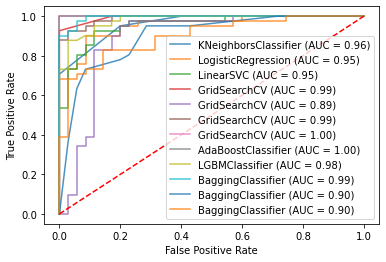

In [89]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc

for name in Each_model_dict:
    Each_model_dict[name].fit(x_test, y_test)
    ax = plt.gca()
    plt.plot(ax=ax, alpha=0.8)
    plot_roc_curve(Each_model_dict[name], x_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1],'r--',label ='AUC = 0.50')
plt.show()

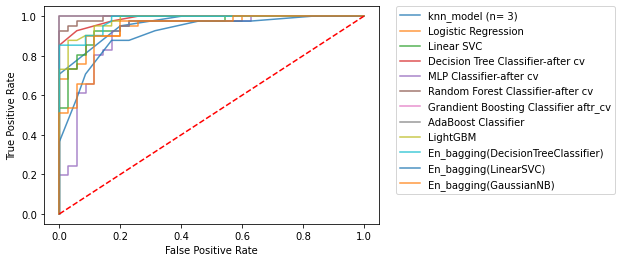

In [90]:
#change marking model name and legend area make it more clear 
for name in Each_model_dict:
    Each_model_dict[name].fit(x_test, y_test)
    ax = plt.gca()
    plt.plot(ax=ax, alpha=0.8)
    plot_roc_curve(Each_model_dict[name], x_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1],'r--',label ='AUC = 0.50')
ax.legend(Each_model_name,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# Final score of models

In [91]:
Each_model_name

['knn_model (n= 3)',
 'Logistic Regression',
 'Linear SVC',
 'Decision Tree Classifier-after cv',
 'MLP Classifier-after cv',
 'Random Forest Classifier-after cv',
 'Grandient Boosting Classifier aftr_cv',
 'AdaBoost Classifier',
 'LightGBM',
 'En_bagging(DecisionTreeClassifier)',
 'En_bagging(LinearSVC)',
 'En_bagging(GaussianNB)']

In [92]:
for fun_name in Each_model_name:
    print('The score of {:<40}   : {:.3f}'.format(fun_name, Each_model_accuracy[fun_name]))

The score of knn_model (n= 3)                           : 0.868
The score of Logistic Regression                        : 0.842
The score of Linear SVC                                 : 0.842
The score of Decision Tree Classifier-after cv          : 0.763
The score of MLP Classifier-after cv                    : 0.829
The score of Random Forest Classifier-after cv          : 0.842
The score of Grandient Boosting Classifier aftr_cv      : 0.789
The score of AdaBoost Classifier                        : 0.803
The score of LightGBM                                   : 0.842
The score of En_bagging(DecisionTreeClassifier)         : 0.763
The score of En_bagging(LinearSVC)                      : 0.842
The score of En_bagging(GaussianNB)                     : 0.895


In [93]:
Function_sorted_by_accuracy = sorted(Each_model_accuracy.items(), key=lambda x:x[1], reverse=True)
for name in Function_sorted_by_accuracy:
    print('{:<40}: {}'.format(name[0], name[1]))

En_bagging(GaussianNB)                  : 0.8947368421052632
knn_model (n= 3)                        : 0.868421052631579
Logistic Regression                     : 0.8421052631578947
Linear SVC                              : 0.8421052631578947
Random Forest Classifier-after cv       : 0.8421052631578947
LightGBM                                : 0.8421052631578947
En_bagging(LinearSVC)                   : 0.8421052631578947
MLP Classifier-after cv                 : 0.8289473684210527
AdaBoost Classifier                     : 0.8026315789473685
Grandient Boosting Classifier aftr_cv   : 0.7894736842105263
Decision Tree Classifier-after cv       : 0.7631578947368421
En_bagging(DecisionTreeClassifier)      : 0.7631578947368421


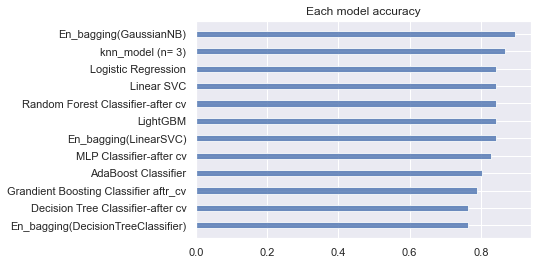

In [96]:
plt.clf() #clean old plot
Each_model_accuracy_list = [] 
Sorted_model_name_list = []
for name in Function_sorted_by_accuracy:
    Each_model_accuracy_list.append(Each_model_accuracy[name[0]])
    Sorted_model_name_list.append(name[0])
    
## let picture from high to low
Sorted_model_name_list.reverse()  
Each_model_accuracy_list.reverse()

plt.barh(Sorted_model_name_list, height =0.35, width = Each_model_accuracy_list, alpha = 0.8)
plt.title('Each model accuracy')
sns.set(color_codes=True)
plt.show()

In [97]:
print('For best 5 accuracy model in this test:')
print('    Model name    |     Accuracy    ')
for i in range(5):
    print(Function_sorted_by_accuracy[i])

For best 5 accuracy model in this test:
    Model name    |     Accuracy    
('En_bagging(GaussianNB)', 0.8947368421052632)
('knn_model (n= 3)', 0.868421052631579)
('Logistic Regression', 0.8421052631578947)
('Linear SVC', 0.8421052631578947)
('Random Forest Classifier-after cv', 0.8421052631578947)
